In [1]:
%pylab inline

%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tensorflow as tf

sess = tf.compat.v1.InteractiveSession()
K = tf.keras.backend


In [3]:
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D

# Datasets

In [4]:
mnist = tf.keras.datasets.mnist.load_data()

(x_train, y_train), (x_test,y_test) =mnist
y_train_cat = tf.keras.utils.to_categorical(y_train)

## 1. Rescaled MNIST

In [ ]:
n = 9
x1_train = tf.image.resize(x_train[...,newaxis]/x_train[0].max(), size = (n,n))

X = x1_train.numpy().reshape((x1_train.shape[0],-1))
H = corrcoef(X.T + 1e-10*randn(*X.T.shape))

X_c = array([ X1[where(y_train==i)].mean(0) for i in range(10)]).T

## 2. Rotated MNIST

In [ ]:
from scipy import ndimage, misc
# import matplotlib.pyplot as plt

In [ ]:
x,y = x_train, y_train
n = x_train.shape[1]
tmp = [0,1,2,3,4,6,7,8]
xf = array(x[where(y==0)].tolist() + x[where(y==1)].tolist() + x[where(y==2)].tolist() + x[where(y==3)].tolist() + x[where(y==4)].tolist() + x[where(y==6)].tolist() + x[where(y==7)].tolist() + x[where(y==8)].tolist())
yf = array([0]*len(where(y==0)[0])+[1]*len(where(y==1)[0])+[2]*len(where(y==2)[0])+[3]*len(where(y==3)[0])+[4]*len(where(y==4)[0])+[5]*len(where(y==6)[0])+[6]*len(where(y==7)[0])+[7]*len(where(y==8)[0]))
N = len(xf)
ims = zeros((N,n,n))
for i in range(N):
    theta = rand()*180 - 90
    tr = ndimage.rotate(xf[i], theta, reshape=False)
    ims[i] = tr

In [ ]:
sizes = [len(where(y==i)[0]) for i in tmp]

# Flatten images
X = ims.reshape((ims.shape[0],-1))
H = corrcoef(X.T + 1e-10*randn(*X.T.shape))

In [ ]:
# randomize order of images
idx = argsort(rand(len(ims))) 
x1_train = ims[idx]
y_train = yf[idx]
y_train_cat = tf.keras.utils.to_categorical(y_train)

# add channel dimension 
x1_train = x1_train[...,newaxis]

X_c = array([ X[sum(sizes[:i]+[0]):sum(sizes[:i+1])].mean(0) for i in range(len(tmp))]).T


# simple one dense layer 

In [ ]:
in_lay = Input(shape=(x1_train[0].shape))

flat_lay = Flatten()(in_lay)

den = Dense(y_train_cat.shape[-1], activation='softmax')(flat_lay)

In [ ]:
model = tf.keras.Model(inputs = [in_lay], outputs = [den])

In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [26]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 6280      
Total params: 6,280
Trainable params: 6,280
Non-trainable params: 0
_________________________________________________________________


In [28]:
h = model.fit(x1_train[...,0], y_train_cat, epochs=30, validation_split=0.2)

Epoch 1/5
1216/1216 [==============================] - 2s 2ms/step - loss: 10.6840 - accuracy: 0.6798 - val_loss: 11.4555 - val_accuracy: 0.6703
Epoch 2/5
1216/1216 [==============================] - 2s 2ms/step - loss: 10.5681 - accuracy: 0.6802 - val_loss: 12.6483 - val_accuracy: 0.6392
Epoch 3/5
1216/1216 [==============================] - 2s 2ms/step - loss: 10.6688 - accuracy: 0.6787 - val_loss: 12.3718 - val_accuracy: 0.6489
Epoch 4/5
1216/1216 [==============================] - 2s 2ms/step - loss: 10.5259 - accuracy: 0.6834 - val_loss: 10.6034 - val_accuracy: 0.6866
Epoch 5/5
1216/1216 [==============================] - 2s 2ms/step - loss: 10.6084 - accuracy: 0.6803 - val_loss: 10.9022 - val_accuracy: 0.6836


Text(0.5, 0, 'epoch')

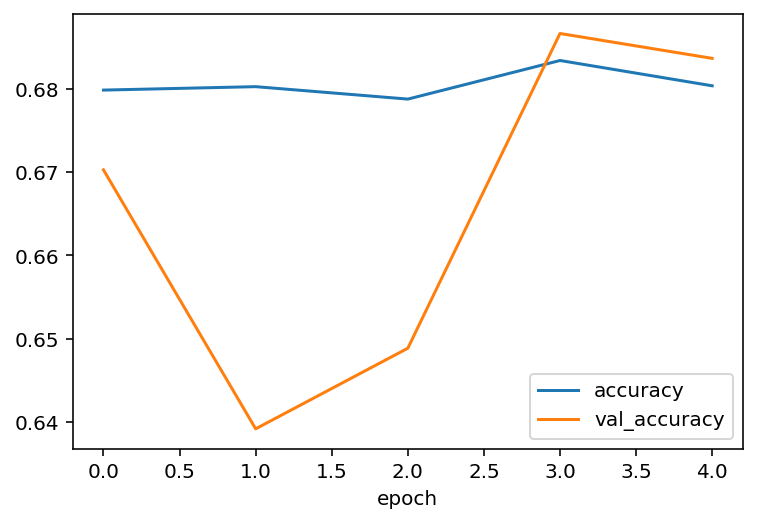

In [29]:
for k in ['accuracy', 'val_accuracy']:
    plot(h.history[k], label = k)
    
legend()
xlabel('epoch')

# Two dense layers

In [ ]:
in_lay = Input(shape=(x1_train[0].shape))

flat_lay = Flatten()(in_lay)

den1 = Dense( 28 , activation='relu')(flat_lay)
den2 = Dense(units=y_train_cat.shape[-1], activation='softmax' )(den1)

In [ ]:
model = tf.keras.Model(inputs = [in_lay], outputs = [den2])

In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [33]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 28)                21980     
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 232       
Total params: 22,212
Trainable params: 22,212
Non-trainable params: 0
_________________________________________________________________


In [34]:
h = model.fit(x1_train[...,0], y_train_cat, epochs=30, validation_split=0.2)

Epoch 1/5
1216/1216 [==============================] - 2s 2ms/step - loss: 2.9565 - accuracy: 0.4109 - val_loss: 1.5027 - val_accuracy: 0.4741
Epoch 2/5
1216/1216 [==============================] - 2s 2ms/step - loss: 1.4106 - accuracy: 0.5639 - val_loss: 1.4546 - val_accuracy: 0.5820
Epoch 3/5
1216/1216 [==============================] - 2s 2ms/step - loss: 1.2599 - accuracy: 0.6262 - val_loss: 1.2871 - val_accuracy: 0.6479
Epoch 4/5
1216/1216 [==============================] - 2s 2ms/step - loss: 1.1523 - accuracy: 0.6678 - val_loss: 1.3194 - val_accuracy: 0.6696
Epoch 5/5
1216/1216 [==============================] - 2s 2ms/step - loss: 1.1055 - accuracy: 0.6915 - val_loss: 1.1615 - val_accuracy: 0.6511


# CovNet 

In [ ]:
x1_train = tf.image.resize(x_train[...,newaxis]/x_train[0].max(), size = (9,9))[...,newaxis] 

# x2_train = x1_train[...,newaxis] 

In [ ]:
num_filters = 16
in_dim = x1_train[0].shape

model = tf.keras.Sequential()

model.add( Conv2D(num_filters,kernel_size=(2,2),activation='relu',input_shape = in_dim ))
model.add( tf.keras.layers.MaxPool2D(pool_size=(2,2) ) )

model.add( Flatten() )
model.add( Dense(y_train_cat.shape[-1], activation='softmax')) # number of categories

In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 16)        80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 21640     
Total params: 21,720
Trainable params: 21,720
Non-trainable params: 0
_________________________________________________________________


In [39]:
h = model.fit(x1_train, y_train_cat, epochs=10, validation_split=0.2)

Epoch 1/2
1216/1216 [==============================] - 14s 11ms/step - loss: 0.6068 - accuracy: 0.8492 - val_loss: 0.3929 - val_accuracy: 0.8816
Epoch 2/2
1216/1216 [==============================] - 13s 11ms/step - loss: 0.3344 - accuracy: 0.8955 - val_loss: 0.3359 - val_accuracy: 0.8958


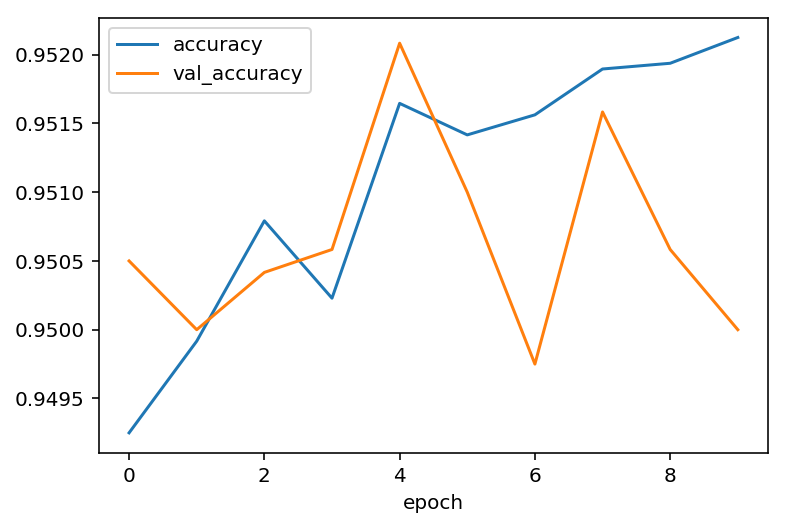

In [ ]:
for k in ['accuracy', 'val_accuracy']:
    plot(h.history[k], label = k)
    
legend()
xlabel('epoch')

# Random TangentNet

In [ ]:
num_L = 6 # number of generators to use
d = x1_train.shape[1] 
L = K.variable(array([eye(d**2)] + randn(num_L-1, d**2, d**2).tolist()))

In [ ]:
# The TangentNet Architecture
u1 = 16

in_lay = Input(shape=(x1_train[0].shape))

flat_lay = Flatten()(in_lay)

# multiply the inputs by [I, L_1, ... L_n]
XL = tf.transpose((L[newaxis] @ flat_lay[:, newaxis, : ,newaxis])[...,0] , perm = (0,2,1))

den1 = Dense(u1, activation='tanh')(XL)

XL_res = tf.keras.layers.Reshape(ims[0].shape + (u1,) )(den1) 

overlap = XL_res #in_lay[...,newaxis] + XL_res 

pool_lay = tf.keras.layers.MaxPool2D(pool_size=(2,2))(overlap)

den2 = Dense(units=y_train_cat.shape[-1], activation='softmax' )(Flatten()(pool_lay) )

In [ ]:
model = tf.keras.Model(inputs = [in_lay], outputs = [den2])

In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [45]:

model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
tf_op_layer_strided_slice_2  [(None, 1, 784, 1)]       0         
_________________________________________________________________
tf_op_layer_BatchMatMulV2_1  [(None, 6, 784, 1)]       0         
_________________________________________________________________
tf_op_layer_strided_slice_3  [(None, 6, 784)]          0         
_________________________________________________________________
tf_op_layer_Transpose_1 (Ten [(None, 784, 6)]          0         
_________________________________________________________________
dense_8 (Dense)              (None, 784, 16)           112 

In [ ]:
h = model.fit(x1_train[...,0], y_train_cat, epochs=3, validation_split=0.2)

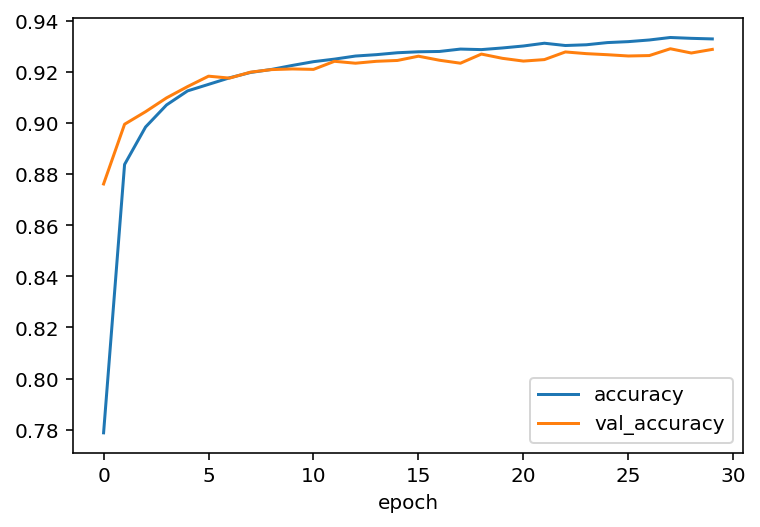

In [ ]:
for k in ['accuracy', 'val_accuracy']:
    plot(h.history[k], label = k)
    
legend()
xlabel('epoch')

# TangentNet

## 1. Find L

We first use our optimization procedure to find symmetry generators

In [ ]:
# dimensions
d = n**2

# regularization coeffiecients
r_symm = 10
r_ck = 10
r_spar = 1

num_Q = 6


def custom_loss(y_true, outputs):
    return K.sum(outputs)


def my_init(shape, dtype=None):
    return K.random_uniform_variable(shape,0,1.0/d*2, dtype=dtype)

# mat_exp = lambda x,d: eye(d) + x + 1/2*x@x + 1/2/3*x@x@x + 1/2/3/4*x@x@x@x + 1/2/3/4/5*x@x@x@x@x \
#+ 1/2/3/4/5/6*x@x@x@x@x@x

def mat_pow(A,p):
    ei,v = eigh(A)
    if p < 0:
        ep = np.where(abs(ei)>1e-8, ei**p, 0.0)
    else: 
        ep = np.where(abs(ei)>1e-8, ei**p, 0.0)
    return v @ diag(ep) @ v.T



In [ ]:


in_dummy = tf.keras.Input((d,d))



# The weights of the dense layer D are used to construct \hat{eps}
D = tf.keras.layers.Dense(num_Q * d, use_bias=False, kernel_initializer=my_init)
eps0 = tf.keras.layers.Reshape((num_Q,d,d))(D(in_dummy))
eps = eps0 - tf.linalg.matrix_transpose(eps0)
eps_u = tf.linalg.band_part(eps, 0, -1)

# g = H = XX^T 
g = tf.constant(H, float32)
Xc = tf.constant(X_c, float32)

L_symm = tf.reduce_sum(tf.norm((mat_pow(g,.5) @ eps/tf.norm(eps_u,axis=[-1,-2])[:,:,newaxis,newaxis] @ mat_pow(g,-.5) @ Xc[newaxis]), axis = 2)/tf.norm(Xc,axis=-2), axis=[-1,-2]) \

orth = tf.reduce_sum(eps_u[:,newaxis]*eps_u[:,:,newaxis], axis=[-1,-2])

L_ck = tf.reduce_sum(tf.math.abs(tf.linalg.band_part(orth,0,-1) - tf.linalg.band_part(orth,0,0)),axis=[-1,-2])/(num_Q-1)*2

L_spar = tf.norm(tf.norm(eps, axis = -1, ord=1)-2, axis=[-1,-2]) + tf.norm(tf.norm(eps, axis = -2, ord=1)-2, axis=[-1,-2])  \
+ tf.norm(tf.norm(eps, axis = -1, ord=np.inf) - 1, axis=[-1,-2]) + tf.norm(tf.norm(eps, axis = -2, ord=np.inf) - 1, axis=[-1,-2])

out = r_symm*L_symm + r_ck*L_ck + r_spar * L_spar

model = tf.keras.Model(inputs = [in_dummy], outputs = [out])

model.compile(loss = custom_loss,)

In [ ]:
epo = 100

# w make dummy identity matrices as inputs to provide batches for the optimization using SGD. 
y_dum = zeros((epo,))

x_dum = array([eye(d) for _ in range(epo)])


h = model.fit([x_dum], y_dum, epochs= epo, verbose=False )

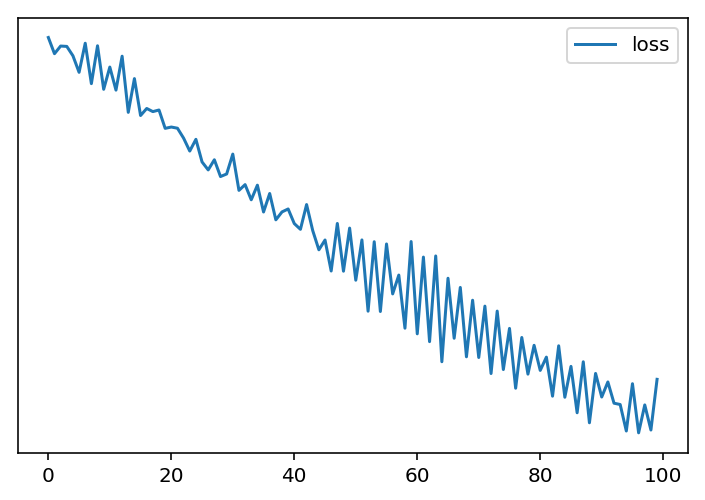

In [ ]:
for k in ['loss']:
    plot(h.history[k], label = k)

yscale('log')
legend()

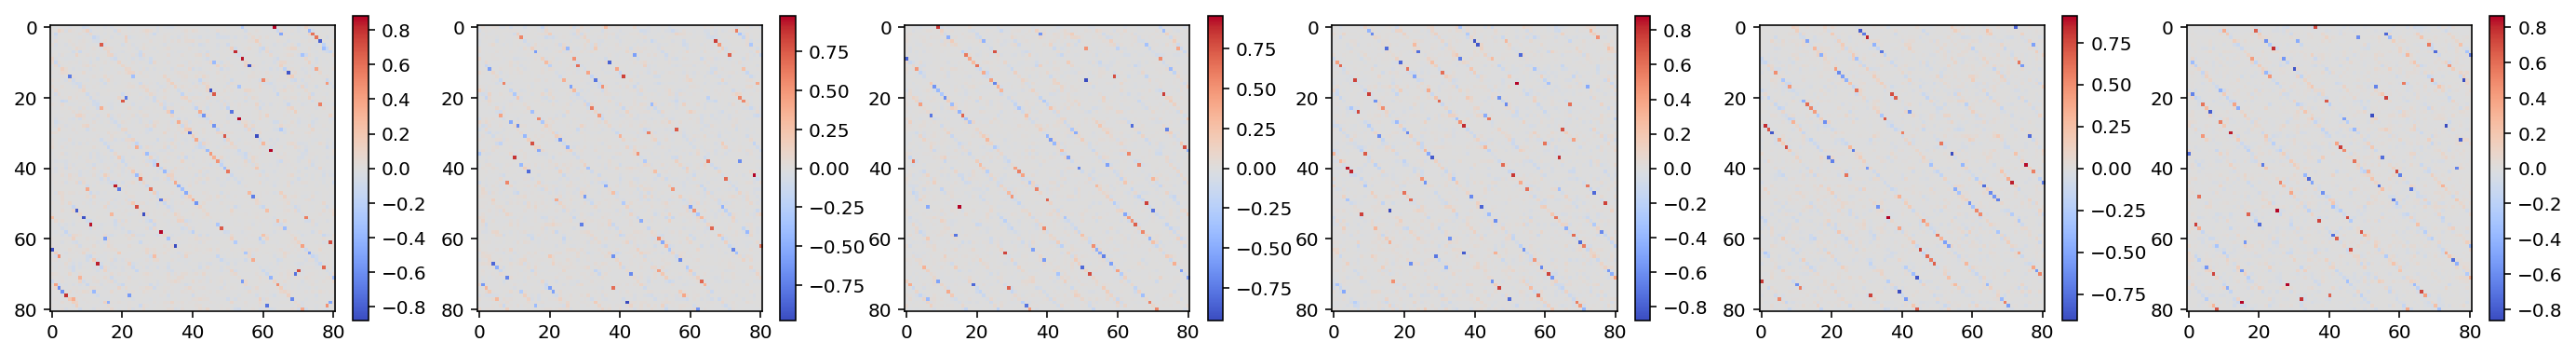

In [ ]:
w = D.weights[0].numpy().reshape((num_Q,d,d))
figure(figsize=(4*num_Q,3))
for i in range(num_Q):
    subplot(1,num_Q,i+1)
    imshow(w[i]-w[i].T, cmap='coolwarm')
    colorbar()


# Common Generators for all Classes
To find common generators shared by all classes, we use the Bron-Kerbosch algorithm.  

In [ ]:
def bron_kerbosch(adj_list,R=set(),P=set(),X=set()):

    #when we have nothing left in the priority queue and checked list
    #by definition, no extra vertex can be added into the clique
    #therefore, we find a maximal clique
    if not P and not X:
        yield R
        
    #while we still got vertices in priority queue
    #we pick a random adjacent vertex and add into the clique
    while P:
        
        v=P.pop()
        
        #the crucial part of the algorithm is here
        yield from bron_kerbosch(adj_list,
                                 
                                 #we add a new adjacent vertex into the result set
                                 #trying to expand the clique to the maximal
                                 R=R.union([v]),
                                 
                                 #the priority queue is bounded by the rule of adjacency
                                 #a vertex can be added into the priority queue
                                 #if and only if it is neighbor to everyone in the current clique
                                 P=P.intersection(set(adj_list[v])),
                                 
                                 #the checked list is bounded by the rule of adjacency as well
                                 #hence, we can minimize the iteration we need
                                 X=X.intersection(set(adj_list[v])))
        
        #the vertex has been checked
        X.add(v)

In [54]:
from collections import defaultdict
thresh = 0.02
adj_list = defaultdict(list)
for i in range(num_Q):
    for j in range(i+1,num_Q):
        if abs(sum(triu(w[i]-w[i].T)*triu(w[j]-w[j].T))) < thresh:
            adj_list[i].append(j)
            adj_list[j].append(i)

list(bron_kerbosch(adj_list,P=set(adj_list.keys())))


[{0, 2}]

## 2. TangetNet

In [ ]:
# The anti-symmetric part of weights w are the generators L = \hat{\eps} we are looking for 
l = array([eye(n**2)]+[w[i]-w[i].T for i in [0,1,2,3,4]])
num_L = len(l)
L = K.variable(l)

In [ ]:
u1 = 16

in_lay = Input(shape=(ims[0].shape))

flat_lay = Flatten()(in_lay)

XL = tf.transpose((L[newaxis] @ flat_lay[:, newaxis, : ,newaxis])[...,0] , perm = (0,2,1))

den1 = Dense(u1, activation='tanh')(XL)

XL_res = tf.keras.layers.Reshape(ims[0].shape + (u1,) )(den1) 

overlap = XL_res 

pool_lay = tf.keras.layers.MaxPool2D(pool_size=(2,2))(overlap)

den2 = Dense(units=10, activation='softmax' )(Flatten()(pool_lay) )

In [ ]:
model = tf.keras.Model(inputs = [in_lay], outputs = [den2])

In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_47 (InputLayer)        [(None, 9, 9)]            0         
_________________________________________________________________
flatten_81 (Flatten)         (None, 81)                0         
_________________________________________________________________
tf_op_layer_strided_slice_86 [(None, 1, 81, 1)]        0         
_________________________________________________________________
tf_op_layer_matmul_37 (Tenso [(None, 6, 81, 1)]        0         
_________________________________________________________________
tf_op_layer_strided_slice_87 [(None, 6, 81)]           0         
_________________________________________________________________
tf_op_layer_transpose_30 (Te [(None, 81, 6)]           0         
_________________________________________________________________
dense_92 (Dense)             (None, 81, 16)            112

In [ ]:
h = model.fit(x1_train[...,0], y_train_cat, epochs=30, validation_split=0.2)

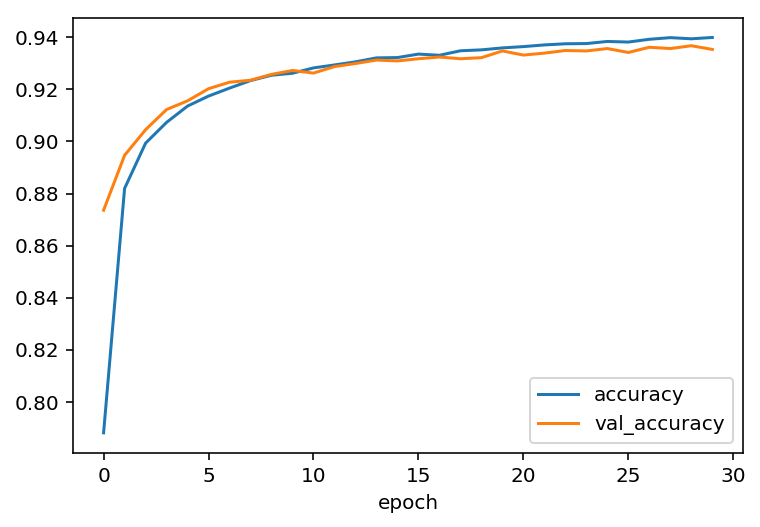

In [ ]:
for k in ['accuracy', 'val_accuracy']:
    plot(h.history[k], label = k)
    
legend()
xlabel('epoch')